In [5]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
from lenstronomy.Plots import plot_util
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot, plot
from mejiro.lenses import test
from mejiro.helpers import pyhalo

In [9]:
lens, rgb_image = test.get_sample(config.machine.sample_dir, config.machine.color_dir, 0)

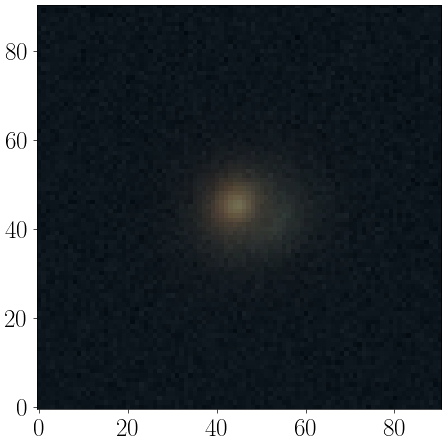

In [10]:
plot.plot(rgb_image)

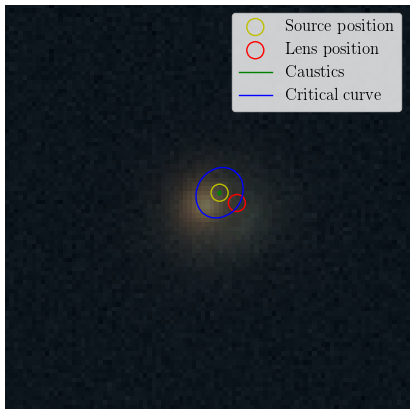

In [11]:
fig, ax = plt.subplots()

ax.imshow(rgb_image, cmap='binary')

overplot.source_position(ax, lens)
overplot.lens_position(ax, lens)
overplot.caustics(ax, lens)
overplot.critical_curves(ax, lens)

# plot_util.scale_bar(ax, d=1, color='k')
# plot_util.source_position_plot(ax, coords, [ra_source], [dec_source])

plt.axis(False)
plt.legend(fontsize=12)

plt.savefig(os.path.join(figure_dir, 'roman_image.png'))
plt.show()